In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML 101.1/data/car.data", names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class values"])

In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,class values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df["buying"] = df["buying"].replace("vhigh", 3)
df["buying"] = df["buying"].replace("high", 2)
df["buying"] = df["buying"].replace("med", 1)
df["buying"] = df["buying"].replace("low", 4)

df["maint"] = df["maint"].replace("vhigh", 3)
df["maint"] = df["maint"].replace("high", 2)
df["maint"] = df["maint"].replace("med", 1)
df["maint"] = df["maint"].replace("low", 4)

df["doors"] =df["doors"].replace("5more", 5) 

df["persons"] =df["persons"].replace("more", 5) 

df["lug_boot"] = df["lug_boot"].replace("big", 2)
df["lug_boot"] = df["lug_boot"].replace("med", 1)
df["lug_boot"] = df["lug_boot"].replace("small", 0)

df["safety"] = df["safety"].replace("high",2)
df["safety"] = df["safety"].replace("med",1)
df["safety"] = df["safety"].replace("low",0)

df["class values"] = df["class values"].replace("vgood",3)
df["class values"] = df["class values"].replace("good",2)
df["class values"] = df["class values"].replace("acc",1)
df["class values"] = df["class values"].replace("unacc",0)


In [ ]:
df = df.astype(int)

In [ ]:
df=df.dropna().reset_index(drop=True)

In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,class values
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,4,4,5,5,1,1,2
1724,4,4,5,5,1,2,3
1725,4,4,5,5,2,0,0
1726,4,4,5,5,2,1,2


In [ ]:
print(df.groupby('class values').size())

class values
0    1210
1     384
2      69
3      65
dtype: int64


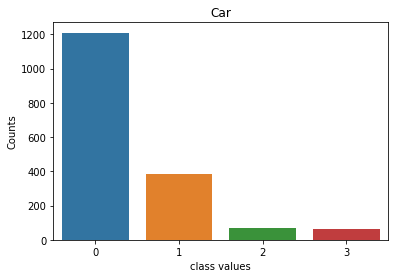

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="class values", data=df)
plt.title("Car")
plt.xlabel("class values")
plt.ylabel("Counts")
plt.show()

In [ ]:
import numpy as np
df_np = df.to_numpy()
x=df_np[:,:-1]
y=df_np[:,-1]

In [ ]:
print(x[:10])
print(f'y = {y[:10]}')

[[3 3 2 2 0 0]
 [3 3 2 2 0 1]
 [3 3 2 2 0 2]
 [3 3 2 2 1 0]
 [3 3 2 2 1 1]
 [3 3 2 2 1 2]
 [3 3 2 2 2 0]
 [3 3 2 2 2 1]
 [3 3 2 2 2 2]
 [3 3 2 4 0 0]]
y = [0 0 0 0 0 0 0 0 0 0]


In [ ]:
import collections
collections.Counter(y)

Counter({0: 1210, 1: 384, 3: 65, 2: 69})

In [ ]:
from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1209, 6), (1209,), (519, 6), (519,))

In [ ]:
np.set_printoptions(suppress=True)
print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[2 4 3 5 1 1]
 [4 3 3 2 1 1]
 [2 3 3 5 1 1]
 [3 1 4 4 0 0]
 [4 4 3 2 2 1]
 [3 1 4 5 1 2]
 [3 2 5 4 1 0]
 [3 1 5 4 1 0]
 [1 2 4 5 1 1]
 [1 3 4 4 1 2]]
y_train = [1 0 0 0 0 1 0 0 1 1]


In [ ]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier

# inizializziamo il metodo con n_neighbors=5
neigh = KNeighborsClassifier(n_neighbors=5)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predict_knn = neigh.predict(X_test)

In [ ]:
print(f'dati predetti dal metodo =                {predict_knn[:10]}')
print(f'dati reali presenti nel dataset di test = {y_test[:10]}')

dati predetti dal metodo =                [0 1 0 1 1 0 0 0 1 1]
dati reali presenti nel dataset di test = [0 3 0 0 1 0 0 0 3 1]


In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


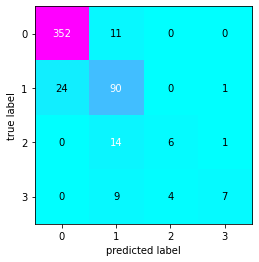

In [ ]:
# valutiamo il nostro metodo:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# visualizziamo la confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, predict_knn), cmap=plt.cm.cool)
plt.show()

In [ ]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       363
           1       0.73      0.78      0.75       115
           2       0.60      0.29      0.39        21
           3       0.78      0.35      0.48        20

    accuracy                           0.88       519
   macro avg       0.76      0.60      0.64       519
weighted avg       0.87      0.88      0.87       519



Maximum accuracy:- 0.882466281310212 at K = 8


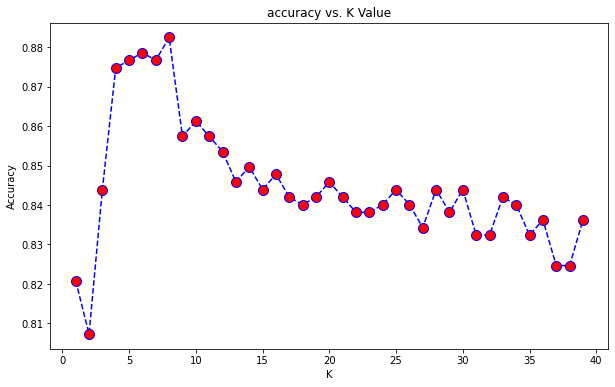

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for k in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)) + 1 )

In [ ]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=8)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predict_knn = neigh.predict(X_test)

In [ ]:
print(f'dati predetti dal metodo =                {predict_knn[:10]}')
print(f'dati reali presenti nel dataset di test = {y_test[:10]}')

dati predetti dal metodo =                [0 1 0 0 1 0 0 0 1 1]
dati reali presenti nel dataset di test = [0 3 0 0 1 0 0 0 3 1]


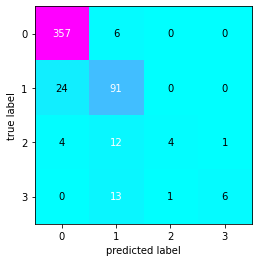

In [ ]:
# valutiamo il nostro metodo:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# visualizziamo la confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, predict_knn), cmap=plt.cm.cool)
plt.show()

In [ ]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       363
           1       0.75      0.79      0.77       115
           2       0.80      0.19      0.31        21
           3       0.86      0.30      0.44        20

    accuracy                           0.88       519
   macro avg       0.83      0.57      0.62       519
weighted avg       0.88      0.88      0.87       519



Maximum accuracy:- 0.8674430284716541 at K = 5


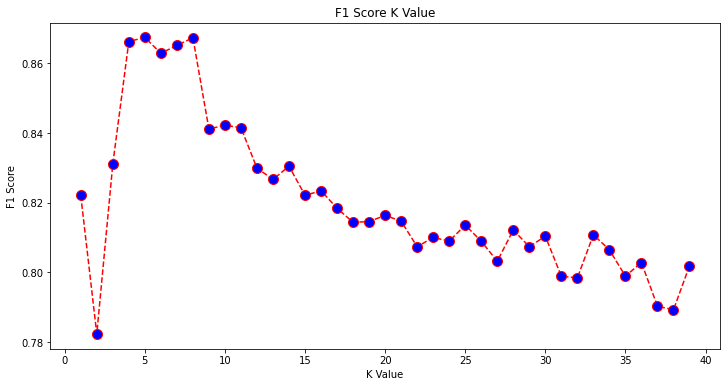

In [ ]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
print("Maximum accuracy:-",max(f1s),"at K =",f1s.index(max(f1s)) + 1)

In [ ]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predict_knn = neigh.predict(X_test)

In [ ]:
print(f'dati predetti dal metodo =                {predict_knn[:10]}')
print(f'dati reali presenti nel dataset di test = {y_test[:10]}')

dati predetti dal metodo =                [0 1 0 1 1 0 0 0 1 1]
dati reali presenti nel dataset di test = [0 3 0 0 1 0 0 0 3 1]


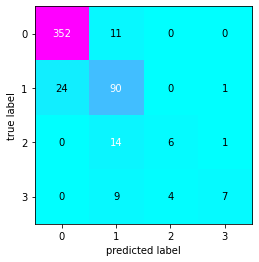

In [ ]:
# valutiamo il nostro metodo:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# visualizziamo la confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, predict_knn), cmap=plt.cm.cool)
plt.show()

In [ ]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       363
           1       0.73      0.78      0.75       115
           2       0.60      0.29      0.39        21
           3       0.78      0.35      0.48        20

    accuracy                           0.88       519
   macro avg       0.76      0.60      0.64       519
weighted avg       0.87      0.88      0.87       519



Maximum accuracy:- 0.6695422805388771 at K = 4


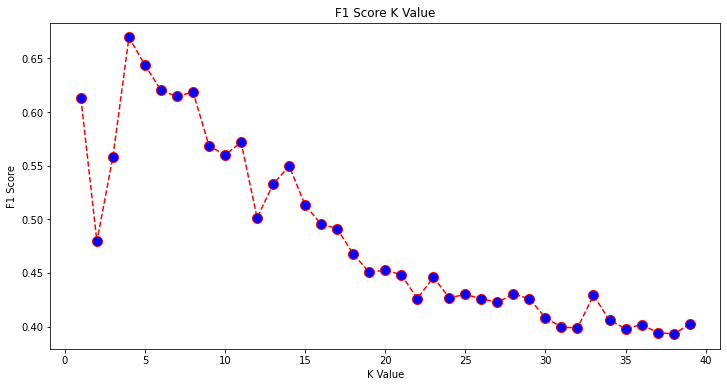

In [ ]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='macro'))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
print("Maximum accuracy:-",max(f1s),"at K =",f1s.index(max(f1s)) + 1)

In [ ]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=4)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predict_knn = neigh.predict(X_test)

In [ ]:
print(f'dati predetti dal metodo =                {predict_knn[:10]}')
print(f'dati reali presenti nel dataset di test = {y_test[:10]}')

dati predetti dal metodo =                [0 1 0 1 1 0 0 0 3 1]
dati reali presenti nel dataset di test = [0 3 0 0 1 0 0 0 3 1]


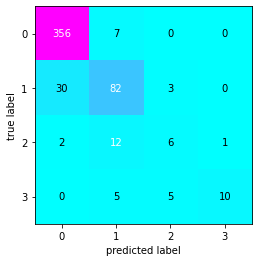

In [ ]:
# valutiamo il nostro metodo:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# visualizziamo la confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, predict_knn), cmap=plt.cm.cool)
plt.show()

In [ ]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       363
           1       0.77      0.71      0.74       115
           2       0.43      0.29      0.34        21
           3       0.91      0.50      0.65        20

    accuracy                           0.87       519
   macro avg       0.76      0.62      0.67       519
weighted avg       0.87      0.87      0.87       519



*Decision Tree

In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict_dt = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict_dt[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0 1 0 1 1 0 0 0 1 1]
dati reali presenti nel dataset di test = [0 3 0 0 1 0 0 0 3 1]


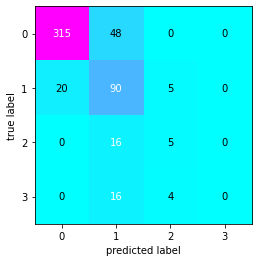

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict_dt), cmap=plt.cm.cool)
plt.show() # DecisionTree

In [ ]:
print(classification_report(y_test, predict_dt))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       363
           1       0.53      0.78      0.63       115
           2       0.36      0.24      0.29        21
           3       0.00      0.00      0.00        20

    accuracy                           0.79       519
   macro avg       0.46      0.47      0.45       519
weighted avg       0.79      0.79      0.78       519



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


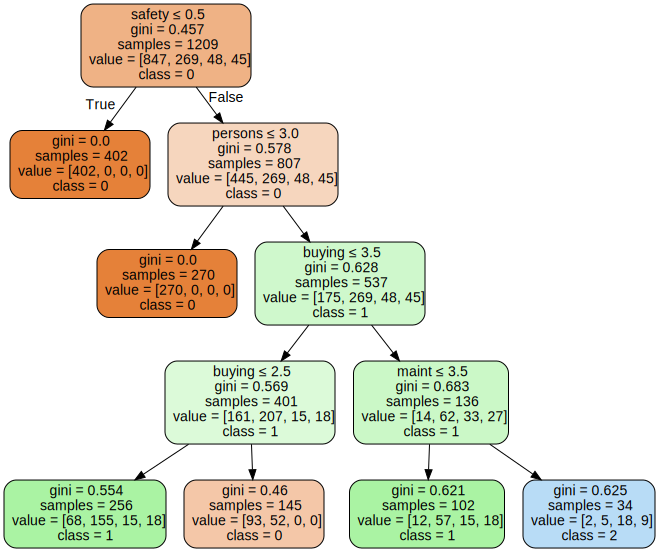

In [ ]:
#save the feature list into a vector (sono i nomi delle colonne del dataset)
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[:-1],  
                     class_names=['0', '1', '2', '3'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('Car')
graph

Maximum accuracy:- 0.8034682080924855 at K = 5


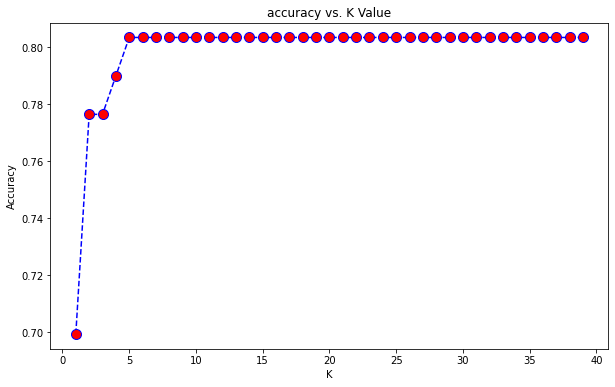

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
  tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=i, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )
  # prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
  tree_clf.fit(X_train,y_train)

  # seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
  predict_dt = tree_clf.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, predict_dt))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)) + 1 )

In [ ]:
# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=5, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict_dt = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict_dt[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0 1 0 1 1 0 0 0 1 1]
dati reali presenti nel dataset di test = [0 3 0 0 1 0 0 0 3 1]


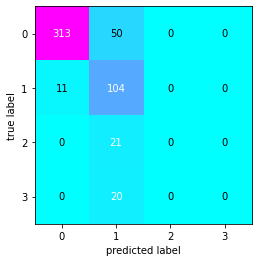

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict_dt), cmap=plt.cm.cool)
plt.show() # DecisionTree

In [ ]:
print(classification_report(y_test, predict_dt))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       363
           1       0.53      0.90      0.67       115
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        20

    accuracy                           0.80       519
   macro avg       0.37      0.44      0.40       519
weighted avg       0.79      0.80      0.79       519



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Maximum accuracy:- 0.7859920024557722 at K = 5


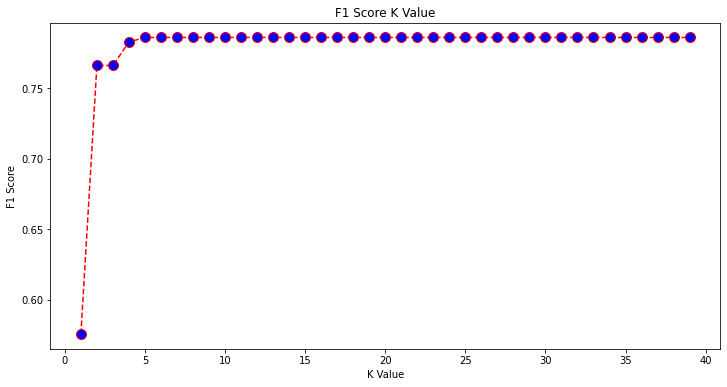

In [ ]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
  tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=i, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )
  # prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
  tree_clf.fit(X_train,y_train)

  # seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
  predict_dt = tree_clf.predict(X_test)

  f1s.append(f1_score(y_test, predict_dt, average='weighted'))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
print("Maximum accuracy:-",max(f1s),"at K =",f1s.index(max(f1s)) + 1)

In [ ]:
# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=5, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict_dt = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict_dt[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0 1 0 1 1 0 0 0 1 1]
dati reali presenti nel dataset di test = [0 3 0 0 1 0 0 0 3 1]


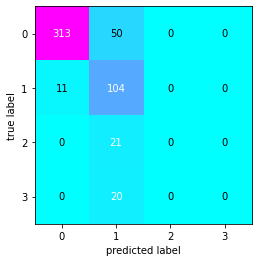

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict_dt), cmap=plt.cm.cool)
plt.show() # DecisionTree

In [ ]:
print(classification_report(y_test, predict_dt))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       363
           1       0.53      0.90      0.67       115
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        20

    accuracy                           0.80       519
   macro avg       0.37      0.44      0.40       519
weighted avg       0.79      0.80      0.79       519



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Maximum accuracy:- 0.4549680074110778 at K = 4


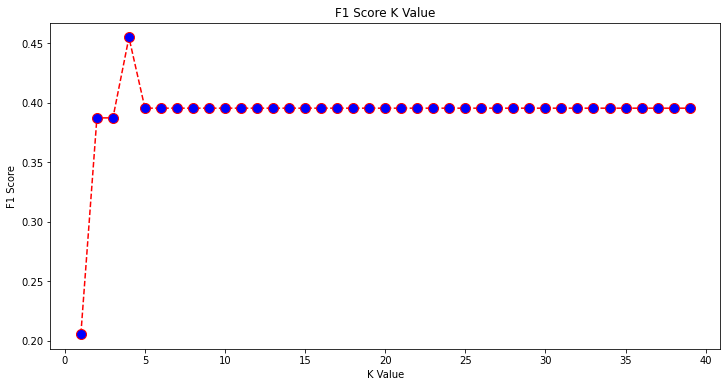

In [ ]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
  tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=i, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )
  # prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
  tree_clf.fit(X_train,y_train)

  # seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
  predict_dt = tree_clf.predict(X_test)
  f1s.append(f1_score(y_test, predict_dt, average='macro'))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
print("Maximum accuracy:-",max(f1s),"at K =",f1s.index(max(f1s)) + 1)

In [ ]:
# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict_dt = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict_dt[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0 1 0 1 1 0 0 0 1 1]
dati reali presenti nel dataset di test = [0 3 0 0 1 0 0 0 3 1]


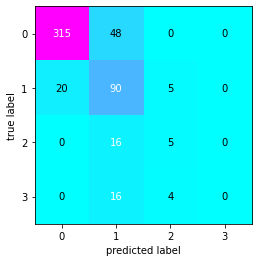

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict_dt), cmap=plt.cm.cool)
plt.show() # DecisionTree

In [ ]:
print(classification_report(y_test, predict_dt))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       363
           1       0.53      0.78      0.63       115
           2       0.36      0.24      0.29        21
           3       0.00      0.00      0.00        20

    accuracy                           0.79       519
   macro avg       0.46      0.47      0.45       519
weighted avg       0.79      0.79      0.78       519



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Il miglior metodo in questo caso è il K-NN